In [175]:
# IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import os
import random
import pickle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import sklearn
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from matplotlib import pyplot
from gensim.models import KeyedVectors
import json

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# IMPORTING AND MOUNTING DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd ..

/


In [4]:
!ls 'content/drive/MyDrive/SML - CSE 575/'


 book_summaries_genres.csv
 booksummaries.txt
'Content Based Filtering Section.gdoc'
'Content Filtering'
 ContentFiltering.ipynb
'Copy of GoogleNews-vectors-negative300.bin.gz'
 CSE_575_Project_Proposal_final.pdf
 datasets
'Final Project '
'Final Report'
 GoogleNews-vectors-negative300.bin.gz
'Group 7-CSE 575: Book Recommendation System.gslides'
'Issue Tracker.gsheet'
'Nikhil Doc.gdoc'
 Proposal
 Ratings_genre.csv
 TestRatingsTotal.csv
 TrainRatingsTotal.csv


In [5]:
%cd '/content/drive/MyDrive/SML - CSE 575/Final Project /Dataset/'

/content/drive/MyDrive/SML - CSE 575/Final Project /Dataset


In [6]:
# For Unzippuing the Book Dataset
!unzip book_data.zip
# !mv archive book_data

Archive:  book_data.zip
replace book_data/Users.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: book_data/Users.csv     
  inflating: book_data/Ratings.csv   
  inflating: book_data/Books.csv     


In [7]:

book_path = "book_data/"

In [8]:
%ls book_data

Books.csv    TestRatings3.csv  TrainRatings3.csv  Users.csv
Ratings.csv  TestRatings.csv   TrainRatings.csv


In [9]:
books_df=pd.read_csv(book_path +"Books.csv")
ratings_df=pd.read_csv(book_path +"Ratings.csv")
users_df=pd.read_csv(book_path +"Users.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#Books.csv Preprocessing
 

In [10]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [11]:
# basic information
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [12]:
# images not required
books_df=books_df[["ISBN","Book-Title","Book-Author",	"Year-Of-Publication", "Publisher"]]

In [13]:
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [14]:
books_df[books_df.isnull().any(axis=1)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [15]:
# na -> unknown 
books_df.fillna("Unknown",inplace=True)

In [16]:
books_df.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
dtype: object

In [17]:
books_df["Year-Of-Publication"].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [18]:
# there are some bad values like 'DK Publishing Inc'
pd.set_option('display.max_colwidth', -1)
books_df[books_df["Year-Of-Publication"]=='DK Publishing Inc']

<ipython-input-18-f10368a162a6>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [19]:
# correcting the dataset
#Interchanging the values
books_df.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books_df.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'
books_df.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books_df.at[209538 ,'Year-Of-Publication'] = '2000'

books_df.at[221678 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books_df.at[221678 ,'Book-Author'] = 'James Buckley'
books_df.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books_df.at[221678 ,'Year-Of-Publication'] = '2000'

books_df.at[220731 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books_df.at[220731 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
books_df.at[220731 ,'Publisher'] = 'Gallimard'
books_df.at[220731 ,'Year-Of-Publication'] = '2003'

In [20]:
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype(int)


In [21]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  int64 
 4   Publisher            271360 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB


In [22]:
# replacing the invalid values with mode
print("The mode of year of publication is:",books_df['Year-Of-Publication'].mode()[0])
books_df[books_df['Year-Of-Publication'] > 2021] = books_df['Year-Of-Publication'].mode()[0]
books_df[books_df['Year-Of-Publication'] == 0] = books_df['Year-Of-Publication'].mode()[0]
#Checking for unique years after replacement
print(sorted(list(books_df['Year-Of-Publication'].unique())))

The mode of year of publication is: 2002
[1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021]


In [23]:
books_df['ISBN'] = books_df['ISBN'].str.upper()

In [24]:
# duplicates 
print("Number of duplicates is:",len(books_df[books_df.duplicated()]))

Number of duplicates is: 4936


In [25]:
# Drop duplicate rows
books_df.drop_duplicates(keep='last', inplace=True)
books_df.reset_index(drop=True, inplace=True)

In [26]:
#shape
print("The shape of users_df is",books_df.shape)

The shape of users_df is (266424, 5)


# Preprocessing for Users.csv

In [27]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [28]:
users_df.isnull().sum()


User-ID     0     
Location    0     
Age         110762
dtype: int64

(array([4.4314e+04, 9.3316e+04, 2.9212e+04, 8.7500e+02, 3.0100e+02,
        2.8000e+01, 1.5000e+01, 5.0000e+00, 1.8000e+01, 1.2000e+01]),
 array([  0. ,  24.4,  48.8,  73.2,  97.6, 122. , 146.4, 170.8, 195.2,
        219.6, 244. ]),
 <a list of 10 Patch objects>)

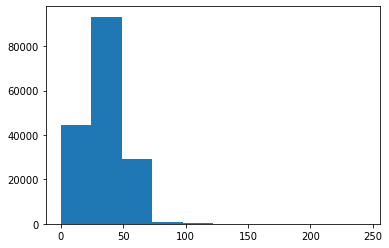

In [29]:
import matplotlib.pyplot as plt
plt.hist(users_df["Age"])

In [30]:
print(sorted(list(users_df['Age'].unique())))   # unique values

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [31]:
# there are many invalid entries like > 150 , we will replace those
users_df.loc[(users_df.Age > 90) | (users_df.Age < 10), 'Age'] = np.nan
users_df.Age = users_df.Age.fillna(users_df.Age.median())
users_df.Age = users_df.Age.astype(np.int32)
print(sorted(users_df.Age.unique()))



[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


# Preprocessing for Ratings.csv

In [32]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [33]:
import re
bookISBN = books_df['ISBN'].tolist()
#Storing any character other than any combination of letters and digits case insensitive
reg = "[^A-Za-z0-9]" 

for index, row_Value in ratings_df.iterrows():
  #Searching for special characters in ratings_df.ISBN
    z = re.search(reg, row_Value['ISBN'])    
    
    if z:
      #Deleting special characters 
        f = re.sub(reg,"",row_Value['ISBN'])
        
        #Checking if the cleaned book id is in books_df or not
        if f in bookISBN:
          #If True we will replace the value with cleaned bookid.If false we will kepp it as itself.Because later while taking inner join it wont affect.
            ratings_df.at[index , 'ISBN'] = f

# Uppercasing all alphabets in ISBN
ratings_df['ISBN'] = ratings_df['ISBN'].str.upper()


In [34]:
print("Number of duplicates is:",len(ratings_df[ratings_df.duplicated()]))

Number of duplicates is: 4


In [35]:
ratings_df.drop_duplicates(keep='last', inplace=True)
ratings_df.reset_index(drop = True, inplace = True)

In [36]:
ratings_df.shape

(1149776, 3)

In [37]:
# merging the dataframes
combined_df = pd.merge(books_df, ratings_df, on='ISBN', how='inner')
combined_df = pd.merge(combined_df, users_df, on='User-ID', how='inner')

In [38]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017530 entries, 0 to 1017529
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1017530 non-null  object
 1   Book-Title           1017530 non-null  object
 2   Book-Author          1017530 non-null  object
 3   Year-Of-Publication  1017530 non-null  int64 
 4   Publisher            1017530 non-null  object
 5   User-ID              1017530 non-null  int64 
 6   Book-Rating          1017530 non-null  int64 
 7   Location             1017530 non-null  object
 8   Age                  1017530 non-null  int32 
dtypes: int32(1), int64(3), object(5)
memory usage: 73.7+ MB


In [39]:
combined_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,"stockton, california, usa",18
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,"timmins, ontario, canada",32
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,"timmins, ontario, canada",32
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,"timmins, ontario, canada",32
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,"timmins, ontario, canada",32


In [40]:
#Creating a list for each location 
sep_list = combined_df.Location.str.split(', ')
#Creating empty lists to store city, state and country  
city = []
state = []
country = []

for i in range(0,len(sep_list)):
     #removing invalid entries 
    if sep_list[i][0] == ' ' or sep_list[i][0] == '' or sep_list[i][0]=='n/a' or sep_list[i][0] == ',': 
        city.append('other')
    else:
        city.append(sep_list[i][0].lower())
    
    #if the sep_list contains only city
    if(len(sep_list[i])<2):
        state.append('other')
        country.append('other')
    else:
        #removing invalid entries
        if sep_list[i][1] == ' ' or sep_list[i][1] == '' or sep_list[i][1]=='n/a' or sep_list[i][1] == ',':    
            state.append('other')      
        else:
            state.append(sep_list[i][1].lower())
        
        #if the sep_list contains only city and country
        if(len(sep_list[i])<3):
            country.append('other')
        else:
            #removing invalid entries
            if sep_list[i][2] == ''or sep_list[i][1] == ',' or sep_list[i][2] == ' ' or sep_list[i][2] == 'n/a':
                country.append('other')
            else:
                country.append(sep_list[i][2].lower())

#Removing location column       
combined_df = combined_df.drop('Location',axis=1)
temp = []

#handling cases in which entries are in the form city/state
for ent in city:
    c = ent.split('/')            
    temp.append(c[0])

#creating dataframes for city, state and country
df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

#concatenating these dataframe with users_df
combined_df = pd.concat([combined_df, df_city], axis=1)
combined_df = pd.concat([combined_df, df_state], axis=1)
combined_df = pd.concat([combined_df, df_country], axis=1)

In [41]:
combined_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,City,State,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,18,stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,32,timmins,ontario,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,32,timmins,ontario,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,32,timmins,ontario,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,32,timmins,ontario,canada


# Exploratory Data Analysis

In [42]:
df=combined_df.copy()

In [43]:
# unique book ratings
df['Book-Rating'].unique()

array([ 0,  5,  6,  7,  9, 10,  8,  3,  1,  4,  2])

In [44]:
# Remove 0 ratings
df=df[~(combined_df["Book-Rating"]==0)]

In [45]:
df['Book-Rating'].value_counts()

8     90426
10    70277
7     65357
9     59924
5     44750
6     31194
4     7497 
3     5037 
2     2334 
1     1461 
Name: Book-Rating, dtype: int64

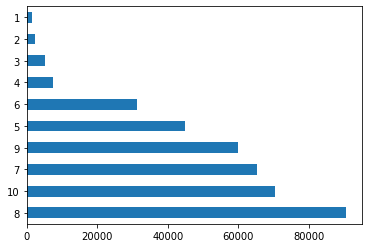

In [46]:
df['Book-Rating'].value_counts().plot(kind='barh')

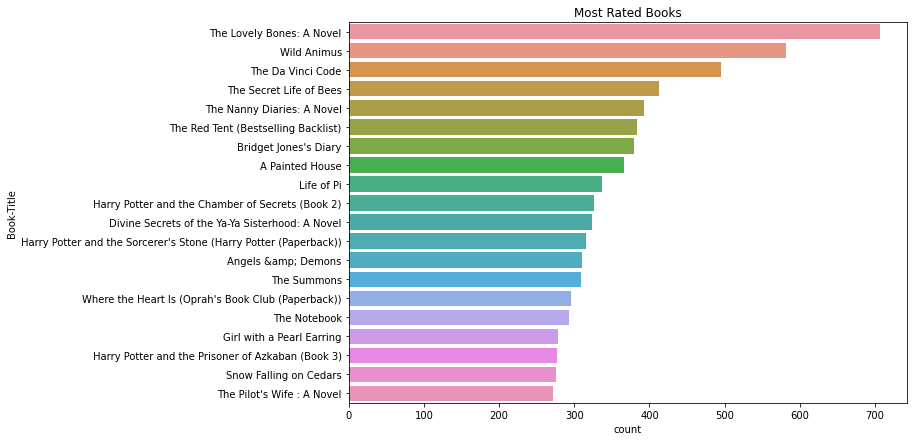

In [47]:
# Most Rated Books
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
most_rated = df['Book-Title'].value_counts().reset_index()
most_rated.columns = ['Book-Title','count']

plt.figure(figsize = (10,7))
plt.title("Most Rated Books")
sns.barplot(x = 'count', y = 'Book-Title', data = most_rated.head(20))
plt.show()

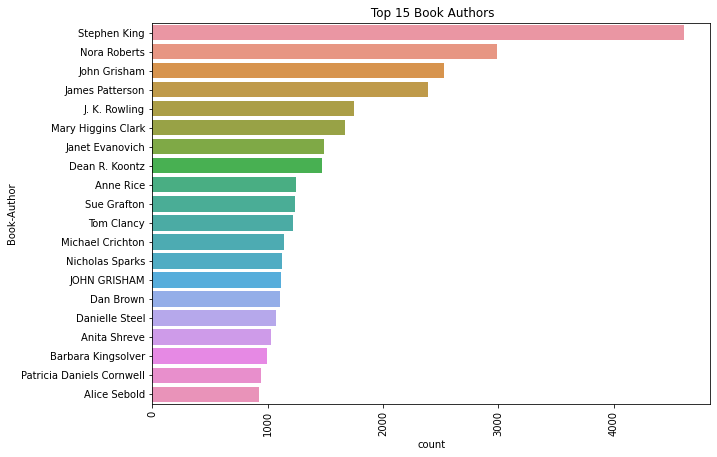

In [48]:
# Top 20 book authors by number of interactions
plt.figure(figsize=(10,7))
sns.countplot(y="Book-Author",order=df['Book-Author'].value_counts().index[0:20],data=df).tick_params(axis='x', rotation=90)
plt.title(" Top 15 Book Authors")
plt.show()

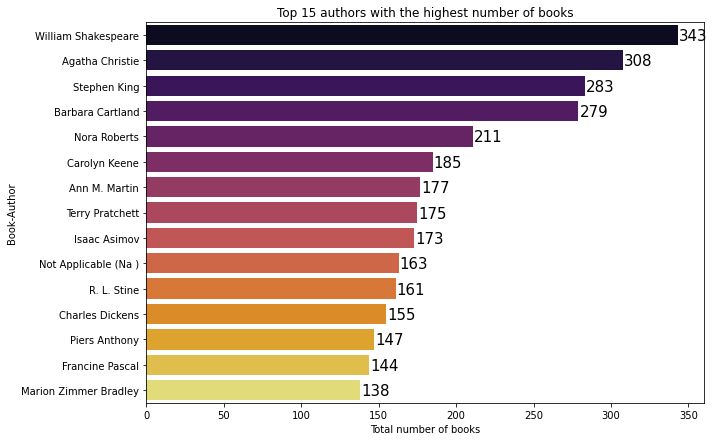

In [49]:
#finding authors with the highest number of books
most_books = df.groupby('Book-Author').agg({'Book-Title':"nunique"}).sort_values(by='Book-Title',ascending=False)
most_books.rename(columns={'Book-Title':'Number of Books'},inplace=True)
most_books.reset_index(inplace=True)
most_books=most_books[:15]
most_books.head()

plt.figure(figsize=(10,7))
ax = sns.barplot(most_books['Number of Books'], most_books["Book-Author"], palette='inferno')
ax.set_title("Top 15 authors with the highest number of books")
ax.set_xlabel("Total number of books")
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.60, i.get_y()+.60,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

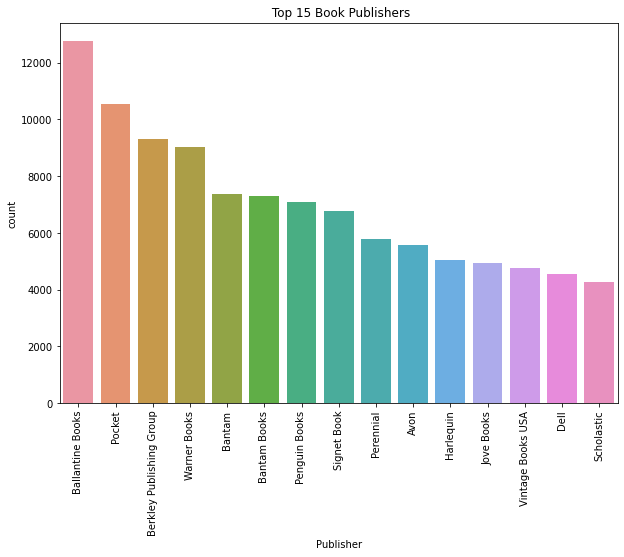

In [50]:
plt.figure(figsize=(10,7))
sns.countplot(x="Publisher",order=df['Publisher'].value_counts().index[0:15],data=df).tick_params(axis='x', rotation=90)
plt.title(" Top 15 Book Publishers")
plt.show()

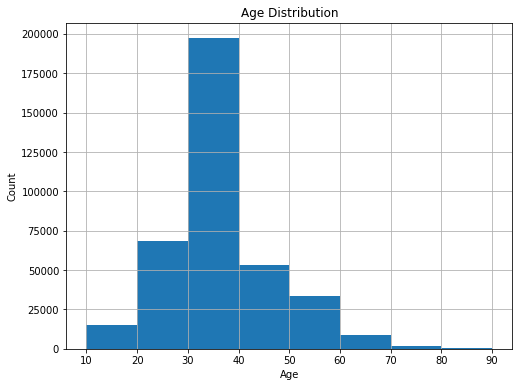

In [51]:
#plotting age distribution
plt.figure(figsize=(8,6))
df.Age.hist(bins=[10*i for i in range(1, 10)])     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Recommendation System

# Popularity based recommendations - generally used as a solution to cold start problem

In [52]:
Top_Books= pd.DataFrame(df.groupby('Book-Title')['Book-Rating'].count()
                         .sort_values(ascending=False).head(20))
#renaming columns
Top_Books.rename(columns={'Book-Rating':'Number of Ratings'},inplace=True)
Top_Books.reset_index(inplace=True)

print('The Top 20 Books Recommendation : ')
Top_Books

The Top 20 Books Recommendation : 


,Book-Title,Number of Ratings
0,The Lovely Bones: A Novel,707
1,Wild Animus,581
2,The Da Vinci Code,495
3,The Secret Life of Bees,413
4,The Nanny Diaries: A Novel,393
5,The Red Tent (Bestselling Backlist),383
6,Bridget Jones's Diary,380
7,A Painted House,366
8,Life of Pi,337
9,Harry Potter and the Chamber of Secrets (Book 2),326


# Weighted Rating

In [53]:
df1=df[["ISBN",'Book-Author','Book-Title','Book-Rating']]
#creating dataframe with vote average and number of ratings 
votes_df= df1.groupby(["ISBN",'Book-Title','Book-Author']).agg({'Book-Rating':"mean",'Book-Title':"count"})
#lenghth of votes_df
print('# of users: %d' % len(votes_df))
#renaming columns
votes_df.rename(columns={"Book-Rating":"Average Rating", "Book-Title":"Number of Votes"},inplace=True)
votes_df.reset_index(inplace=True)
#sorting values in descending order
votes_df.sort_values(by="Number of Votes",ascending=False)

# of users: 147013


,ISBN,Book-Title,Book-Author,Average Rating,Number of Votes
21565,0316666343,The Lovely Bones: A Novel,Alice Sebold,8.185290,707
115998,0971880107,Wild Animus,Rich Shapero,4.390706,581
38210,0385504209,The Da Vinci Code,Dan Brown,8.426230,488
17692,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,8.182768,383
4042,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,7.887500,320
...,...,...,...,...,...
61929,0552993360,To Be Young: Some Chapters of Autobiography,Mary Lutyens,3.000000,1
61928,0552993255,Quiet War of Rebecca Sheldon,Kathleen Rowntree,7.000000,1
61927,0552991872,The Right True End,Stan Barstow,9.000000,1
61926,0552990566,Brother of the More Famous Jack,Barbara Trapido,7.000000,1


In [54]:
# Calculate mean of vote average column
C = votes_df['Average Rating'].mean()
print("C:",C)
# Calculate the minimum number of votes required to be in the chart, m
m = votes_df['Number of Votes'].quantile(0.90)
print("m:",m)
# Filter out all qualified books into a new DataFrame
weighted_rating_df = votes_df.copy().loc[votes_df['Number of Votes'] >= m]
weighted_rating_df.shape

C: 7.528032305000475
m: 4.0


(18395, 5)

In [55]:
def weighted_rating(votes_df, m=m, C=C):
    v = votes_df['Number of Votes']
    R = votes_df['Average Rating']
    # Calculation of weighted average
    return (v/(v+m) * R) + (m/(m+v) * C)

In [56]:
# Define a new feature 'score' and calculate its value with weighted_rating()
weighted_rating_df['score'] = weighted_rating_df.apply(weighted_rating, axis=1)

In [57]:
#Sort books based on score calculated above
weighted_rating_df.sort_values('score', ascending=False,inplace=True)

#Print the top 15 books
weighted_rating_df[["ISBN",'Book-Title',"Book-Author", 'Average Rating', 'Number of Votes', 'score']].head(20)


,ISBN,Book-Title,Book-Author,Average Rating,Number of Votes,score
45823,0439425220,Harry Potter and the Chamber of Secrets Postcard Book,J. K. Rowling,9.869565,23,9.522671
70304,0618002235,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. Tolkien,9.720000,25,9.417660
2638,0060256656,The Giving Tree,Shel Silverstein,9.750000,20,9.379672
102335,0836213319,Dilbert: A Book of Postcards,Scott Adams,9.923077,13,9.359537
131090,1888054557,Postmarked Yesteryear: 30 Rare Holiday Postcards,Pamela E. Apkarian-Russell,10.000000,11,9.340809
23973,0345339738,"The Return of the King (The Lord of the Rings, Part 3)",J.R.R. TOLKIEN,9.402597,77,9.310026
102428,0836220889,Calvin and Hobbes,Bill Watterson,9.583333,24,9.289719
40331,0394800389,Fox in Socks (I Can Read It All by Myself Beginner Books),Dr. Seuss,9.785714,14,9.284007
102382,0836218221,The Authoritative Calvin and Hobbes (Calvin and Hobbes),Bill Watterson,9.600000,20,9.254672
86316,0743454529,"My Sister's Keeper : A Novel (Picoult, Jodi)",Jodi Picoult,9.545455,22,9.235082


# Taking input for our model

In [74]:

book_name = input("Enter a book name: ")
number = int(input("Enter number of books to recommend: "))

Enter a book name: The Giving Tree
Enter number of books to recommend: 20


# Author Based Recommedation

In [75]:
def author_based_recommendation(bookName,n):
  #Getting author name for the user input book
  author=weighted_rating_df.loc[weighted_rating_df['Book-Title'] == bookName].reset_index(drop = True).iloc[0]['Book-Author']

  print("The author of",bookName,"is",author)
  print("Top books by the same author are:\n")
  
  #Storing books written by the same author
  books_by_same_author_df = weighted_rating_df[weighted_rating_df['Book-Author'] == author]
  #Sorting books based on their average rating
  books_by_same_author_df = books_by_same_author_df.sort_values(by=['Average Rating'])
  recommended_books=[]
  w=0
  for i in books_by_same_author_df["Book-Title"]:
        #Avoiding recommending the same user input book aswell as repetation of recomendation and limitting number of recommendation
        #Stops when the number of recommendation  reaches total number of books written by the author
        if (i!= bookName) and (i not in recommended_books) and (len(recommended_books) < n) and (w<=len(books_by_same_author_df["Book-Title"])):
            recommended_books.append(i)
            w+=1
  
  for book in recommended_books:
    print(book)
  return recommended_books
  

In [76]:
author_based=author_based_recommendation(book_name,number)

The author of The Giving Tree is Shel Silverstein
Top books by the same author are:

Falling Up
Uncle Shelby's ABZ Book: A Primer for Adults Only
A Light in the Attic
Where the Sidewalk Ends : Poems and Drawings
The Missing Piece Meets the Big O


# Collaborative Recommendation - k-Nearest Neighbors

In [77]:
df.shape

(378257, 11)

In [78]:
# users with aatleast 150 ratings
criteria=df['User-ID'].value_counts()>150
#Storing index filtered users
criteria=criteria[criteria].index
#Subset of df with filtered users
final_dataset=df[df['User-ID'].isin(criteria)]
print("Shape of final_dataset:",final_dataset.shape)

Shape of final_dataset: (73161, 11)


In [79]:
#Obtaining number of ratings for each books
number_rating=final_dataset.groupby('Book-Title')['Book-Rating'].count().reset_index()
number_rating.rename(columns={"Book-Rating":"Number-of-Ratings"},inplace=True)
#Merging with final dataset
final_rating = final_dataset.merge(number_rating, on="Book-Title")

## Filtering books with atleast 5 ratings
final_rating=final_rating[final_rating['Number-of-Ratings']>=5]
print("Shape of final_dataset:",final_dataset.shape)
final_rating.head(10)

Shape of final_dataset: (73161, 11)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,City,State,Country,Number-of-Ratings
1,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676,9,32,other,other,other,15
2,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,11676,8,32,other,other,other,15
3,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,46398,9,37,san antonio,texas,usa,15
4,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,230522,7,52,colorado springs,colorado,usa,15
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,245827,9,32,albuquerque,other,other,15
6,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,7346,8,49,sunnyvale,california,usa,15
7,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,52584,8,45,livermore,california,usa,15
8,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,135149,7,32,ft. pierce,florida,usa,15
9,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,101851,9,29,keizer,oregon,usa,15
10,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,43246,7,36,toronto,ontario,canada,15


In [80]:
# creating a matrix of user - item interaction

Book_pivot = final_rating.pivot_table(columns='User-ID',index='Book-Title',values='Book-Rating')
#Filling null values with zero
Book_pivot.fillna(0, inplace= True)
Book_pivot

User-ID,2276,4017,4385,6251,6543,6575,7346,11676,12982,13552,...,264082,264321,265115,265889,268932,269566,270713,273113,274061,274301
Book-Title,,,,,,,,,,,,,,,,,,,,,
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,8.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,9.0,0.0,0.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
2061: Odyssey Three,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zombies of the Gene Pool,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
# Converting to sparse matrix
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(Book_pivot)
# plt.plot(book_sparse)

In [82]:
book_sparse

<1746x207 sparse matrix of type '<class 'numpy.float64'>'
	with 13328 stored elements in Compressed Sparse Row format>

In [83]:
from sklearn.neighbors import NearestNeighbors
#Creating an instance of KNN
KNN_model = NearestNeighbors(algorithm='auto')
#Fitting model
KNN_model.fit(book_sparse)

NearestNeighbors()

In [84]:
# # saving the model 
# pickle.dump(KNN_model, open('model_KNN_colaborative.pkl', 'wb'))

In [85]:
def knn_recommendation(bookName,n):

  ''' Take input as book name & Returns n book suggestion based on distance'''

  print("KNN Model Based Recommendations:\n")

  #Getting bookID
  book_id= np.where(Book_pivot.index==bookName)[0][0]
  #Storing distances and suggestions
  # KNN_model = pickle.load(open('model_KNN_colaborative.pkl', 'rb'))
  distances, suggestions=KNN_model.kneighbors(Book_pivot.iloc[book_id, :].values.reshape(1,-1),n_neighbors=n+1)
  #Flatten the array
  suggestions=suggestions.flatten().tolist()
  #Empty list to store recommended items
  sim_items=[]
  for i in range(len(suggestions)):
    #If book is same as ser input
    if i==0:
      print("Recommended books for the book",bookName,"are:\n")
    else:
      print(Book_pivot.index[suggestions[i]])
      #Append recommended books 
      sim_items.append(Book_pivot.index[suggestions[i]])
  return sim_items

In [86]:
knn_rec=knn_recommendation(book_name,number)

KNN Model Based Recommendations:

Recommended books for the book The Giving Tree are:

Falling Up
A Light in the Attic
Mexico
Letters from a Nut
Caribbean
What to Expect the First Year
American Indian Myths and Legends (Pantheon Fairy Tale and Folklore Library)
There's Treasure Everywhere--A Calvin and Hobbes Collection
Find Me
The Authoritative Calvin and Hobbes (Calvin and Hobbes)
The Ultimate Hitchhiker's Guide
Waiting
The Devil Wears Prada : A Novel
The Passion
Foundation and Earth
Track of the Cat (Anna Pigeon Mysteries (Paperback))
Alaska
The Mothman Prophecies
Gardening for Dummies
To the Lighthouse


In [87]:
knn_rec_test = knn_recommendation("Pride and Prejudice",10)

KNN Model Based Recommendations:

Recommended books for the book Pride and Prejudice are:

How to Be Good
The House of the Spirits
Black Beauty
Tiger Eyes
The Funhouse
The English Patient
About a Boy (Movie Tie-In)
The Sexual Life of Catherine M.
Naked Lunch
Apocalipstick


In [88]:
#Creating an instance of KNN
cosine_model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
#Fitting model
cosine_model.fit(book_sparse)
# pickle.dump(model, open('model_KNN_cosine.pkl', 'wb'))

NearestNeighbors(algorithm='brute', metric='cosine')

In [89]:
# define fuction for for output
def cosine_similairty_recommendation(bookName,number):

  print("Cosine Similarity  Based Recommendations:\n")
  print("Recommended books for the book",bookName,"are:\n")
  #Store distances and indices of n neighbors
  # cosine_model = pickle.load(open('model_KNN_cosine.pkl', 'rb'))
  distances, indices = cosine_model.kneighbors(Book_pivot.loc[bookName].values.reshape(1, -1), n_neighbors = number+1)
  #Empty list to store recommended items
  sim_items=[]
  for i in range(0, len(distances.flatten())):
      #Avoiding recommending user input book
      if i > 0:
        print(Book_pivot.index[indices.flatten()[i]]) 
        #Append recommended items 
        sim_items.append(Book_pivot.index[indices.flatten()[i]])
  return sim_items

In [90]:
cosine_sim_rec=cosine_similairty_recommendation("The Client",10)

Cosine Similarity  Based Recommendations:

Recommended books for the book The Client are:

The Pelican Brief
Tomorrow'S Promise
The Firm
The Partner
A Time to Kill
Season of Passion
Secrets
Montana Sky
The Chamber
Crossings


# Collaborative Recommendation - Singular Value Decomposition

In [91]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from scipy.sparse.linalg import svds
import random
import math

In [92]:
#Filtering books with nonzero ratings
explicit_ratings_df = combined_df[combined_df["Book-Rating"] != 0]
explicit_ratings_df.shape

(378257, 11)

In [93]:
#Subset with required columns
df3 = explicit_ratings_df[["User-ID","ISBN","Book-Title","Book-Rating"]]
df3.head()

,User-ID,ISBN,Book-Title,Book-Rating
1,8,0002005018,Clara Callan,5
9,8,074322678X,Where You'll Find Me: And Other Stories,5
12,8,0887841740,The Middle Stories,5
13,8,1552041778,Jane Doe,5
15,8,1567407781,The Witchfinder (Amos Walker Mystery Series),6


In [94]:
#Filtering books with atleast 10 reviews
df3 = df3.groupby("ISBN").filter(lambda x : len(x) > 10)
df3["ISBN"].value_counts()

0316666343    707
0971880107    581
0385504209    488
0312195516    383
0060928336    320
             ... 
0446364150    11 
0671656155    11 
0886773849    11 
0590383892    11 
1573220485    11 
Name: ISBN, Length: 4740, dtype: int64

In [95]:
df3.shape

(131896, 4)

In [96]:
print('Number  of user - item(book) interactions: %d' % len(df3))

Number  of user - item(book) interactions: 131896


In [97]:
#Creating dataframe of users interaction count
users_interactions_count_df = df3.groupby(["User-ID","ISBN"]).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))
#Filtering users with enough interactions
users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df > 10].reset_index()[['User-ID']]
print('# of users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))
users_with_enough_interactions_df.head()

# of users: 37802
# of users with at least 5 interactions: 2276


,User-ID
0,243
1,254
2,507
3,638
4,805


In [98]:
print('# of interactions: %d' % len(df3))
#Merging
interactions_from_selected_users_df = df3.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 10 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 131896
# of interactions from users with at least 10 interactions: 62225


In [99]:
interactions_full_df = interactions_from_selected_users_df.copy()

In [100]:
def smooth_user_preference(x):
    '''Function to smooth column'''
    return math.log(1+x, 2)
#applying function
interactions_full_df["Book-Rating"]= interactions_full_df["Book-Rating"].apply(smooth_user_preference)
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 62225


,User-ID,ISBN,Book-Title,Book-Rating
0,243,0060977493,The God of Small Things,3.000000
1,243,0375400117,Memoirs of a Geisha,3.459432
2,243,0449006522,Manhattan Hunt Club,2.807355
3,243,0553580388,The Patient,3.169925
4,243,0786863986,A Monk Swimming,2.584963


In [101]:
#Checking for duplicates
len(interactions_full_df[interactions_full_df[['User-ID','ISBN']].duplicated()])

34

In [102]:
#Removing duplicates
interactions_full_df = interactions_full_df.drop_duplicates(
  subset = ['User-ID', 'ISBN'],
  keep = 'last').reset_index(drop = True)
#Checking shape
interactions_full_df.shape

(62191, 4)

In [103]:
#Train test split
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'],                            
                                   test_size=0.20,
                                   random_state=0)
#Checking shape
print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 49752
# interactions on Test set: 12439


In [104]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.reset_index().pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0007110928,0007154615,0020198817,0020198906,0020199600,002026478X,0020427859,0020442009,0020442203,0020442300,...,8478884459,8478884955,8478886451,8483101610,8495501090,8495618605,8804342838,8806142100,8806143042,8807813025
User-ID,,,,,,,,,,,,,,,,,,,,,
243,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,3.321928,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
805,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
#Checking shape
users_items_pivot_matrix_df.shape

(2276, 4702)

In [106]:
#Storing user ids
users_ids = list(users_items_pivot_matrix_df.index)

In [107]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 20

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix_df, k = NUMBER_OF_FACTORS_MF)

In [108]:
#Converting sigma into diagonal matrix
sigma = np.diag(sigma)
sigma.shape

(20, 20)

In [109]:
#Taking dot products 
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

In [110]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,243,254,507,638,805,882,929,1131,1424,1435,...,277945,278026,278137,278188,278194,278418,278535,278582,278633,278843
ISBN,,,,,,,,,,,,,,,,,,,,,
0007110928,0.007500,0.002632,0.001202,0.021717,0.013842,0.024617,0.003819,-0.001789,0.004089,0.009020,...,0.003263,0.005195,0.002231,0.006088,0.002414,0.005320,0.012964,0.009713,-0.004033,-0.000654
0007154615,-0.032587,0.001002,0.038957,0.117162,0.005477,0.037344,0.015915,0.001932,0.017539,-0.019722,...,-0.003287,0.012098,-0.000869,0.000664,0.004490,-0.003244,-0.009096,0.001471,-0.032849,0.013965
0020198817,-0.003769,0.021941,-0.002932,0.008891,0.018569,-0.002803,0.004358,0.000642,0.003355,-0.000057,...,0.000425,-0.001760,0.003139,-0.002669,0.000561,0.002288,-0.002481,-0.003159,-0.005931,0.021623
0020198906,0.011918,0.006898,0.009579,-0.000464,-0.005621,0.004632,0.001983,-0.000756,0.005625,0.003841,...,0.011513,0.025850,0.001281,0.013217,0.001822,0.004941,0.021614,0.031109,-0.005812,-0.000862
0020199600,-0.007396,-0.009003,-0.001689,0.012851,-0.010574,0.018563,0.002008,-0.011639,-0.003883,-0.007206,...,-0.005187,0.017461,0.010650,-0.007763,-0.001977,0.001968,0.007904,0.019722,-0.011030,-0.006887


In [111]:
#Checking length
len(cf_preds_df.columns)

2276

In [112]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [113]:
class CFRecommender:
    #Storing model name
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None):
        #Creating attributes
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        '''This will return model name'''
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'Book-Rating'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('Book-Rating', ascending = False).head(topn)

        if verbose:
            #runs only if verbose=True
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')
            #Merging 
            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'ISBN', 
                                                          right_on = 'ISBN')[["ISBN",'Book-Title',	'Book-Author', 'Year-Of-Publication',	'Publisher']]

        return recommendations_df

#Creating object of the class   
cf_recommender_model = CFRecommender(cf_preds_df, books_df)

In [114]:
def get_items_interacted(person_id, interactions_df):
    '''
    This function will take user id as input and return interacted items
    '''
    interacted_items = interactions_df.loc[person_id]['ISBN']
    #Repetation is avoided by taking set
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [115]:
#Recommendation for a single user - 0
cf_recommender_model.recommend_items(users_ids[0],items_to_ignore= get_items_interacted(users_ids[0],interactions_train_indexed_df),verbose=True)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
1,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),Billie Letts,1998,Warner Books
2,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books
3,067976402X,Snow Falling on Cedars,David Guterson,1995,Vintage Books USA
4,0671003755,She's Come Undone (Oprah's Book Club (Paperback)),Wally Lamb,1996,Washington Square Press
5,0452282829,We Were the Mulvaneys,Joyce Carol Oates,1996,Plume
6,0385484518,"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",MITCH ALBOM,1997,Doubleday
7,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
8,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
9,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion


In [116]:
#Recommendation for a single user - 10
cf_recommender_model.recommend_items(users_ids[10],items_to_ignore= get_items_interacted(users_ids[0],interactions_train_indexed_df),verbose=True)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0345337662,Interview with the Vampire,Anne Rice,1993,Ballantine Books
1,0345313860,"The Vampire Lestat (Vampire Chronicles, Book II)",ANNE RICE,1986,Ballantine Books
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
3,034538475X,The Tale of the Body Thief (Vampire Chronicles (Paperback)),Anne Rice,1993,Ballantine Books
4,0345351525,The Queen of the Damned (Vampire Chronicles (Paperback)),Anne Rice,1993,Ballantine Books
5,0316769487,The Catcher in the Rye,J.D. Salinger,1991,"Little, Brown"
6,0345384466,The Witching Hour (Lives of the Mayfair Witches),ANNE RICE,1993,Ballantine Books
7,0446310786,To Kill a Mockingbird,Harper Lee,1988,Little Brown &amp; Company
8,0451524934,1984,George Orwell,1990,Signet Book
9,0399501487,Lord of the Flies,William Gerald Golding,1959,Perigee Trade


In [117]:
#Recommendation for a single user - 113519
cf_recommender_model.recommend_items(113519,items_to_ignore= get_items_interacted(113519,interactions_train_indexed_df),verbose=True)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
1,0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books
2,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
3,0060930535,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial
4,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
5,0385484518,"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",MITCH ALBOM,1997,Doubleday
6,0452282829,We Were the Mulvaneys,Joyce Carol Oates,1996,Plume
7,0671003755,She's Come Undone (Oprah's Book Club (Paperback)),Wally Lamb,1996,Washington Square Press
8,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket
9,0156027321,Life of Pi,Yann Martel,2003,Harvest Books


In [118]:
#Recommendation for a single user - 238557
cf_recommender_model.recommend_items(238557,items_to_ignore= get_items_interacted(238557,interactions_train_indexed_df),verbose=True)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0440214041,The Pelican Brief,John Grisham,1993,Dell
1,0440211727,A Time to Kill,JOHN GRISHAM,1992,Dell
2,0440224764,The Partner,John Grisham,1998,Dell Publishing Company
3,0440221471,The Runaway Jury,JOHN GRISHAM,1997,Dell
4,0440213525,The Client,John Grisham,1994,Dell Publishing Company
5,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group
6,044023722X,A Painted House,John Grisham,2001,Dell Publishing Company
7,0345370775,Jurassic Park,Michael Crichton,1999,Ballantine Books
8,0440234743,The Testament,John Grisham,1999,Dell
9,0440236673,The Brethren,John Grisham,2000,Island


In [119]:
#Recommendation for a single user - 238557
cf_recommender_model.recommend_items(238557,items_to_ignore= get_items_interacted(238557,interactions_train_indexed_df),verbose=True)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0440214041,The Pelican Brief,John Grisham,1993,Dell
1,0440211727,A Time to Kill,JOHN GRISHAM,1992,Dell
2,0440224764,The Partner,John Grisham,1998,Dell Publishing Company
3,0440221471,The Runaway Jury,JOHN GRISHAM,1997,Dell
4,0440213525,The Client,John Grisham,1994,Dell Publishing Company
5,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group
6,044023722X,A Painted House,John Grisham,2001,Dell Publishing Company
7,0345370775,Jurassic Park,Michael Crichton,1999,Ballantine Books
8,0440234743,The Testament,John Grisham,1999,Dell
9,0440236673,The Brethren,John Grisham,2000,Island


# Evaluation - Singular Value Decomposition

In [120]:
# Function for getting the set of items which a user has not interacted with
def get_not_interacted_items_sample(person_id, sample_size, seed=42):
    #Storing interacted items
    interacted_items = get_items_interacted(person_id, interactions_full_indexed_df)
    #Getting set of all items
    all_items=set(interactions_full_indexed_df["ISBN"])
    #Obtaining non interacted items
    non_interacted_items = all_items - interacted_items

    random.seed(seed)
    #Selecting random sample of given sample_size
    non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
    return set(non_interacted_items_sample)

In [121]:
# Top-N accuracy metrics
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                #Stores index of item id if it is present in the recommended_items
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                #If item id is not found in the recommended list
                index = -1
            #checking whether index is present in the topN items or not
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        #Obtaining unique interacted items by the user
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = get_not_interacted_items_sample(person_id, sample_size=100, seed=42)

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            #Counting hit at 5
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            #Counting hit at 10
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)
        
        #Creating a dictionary
        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        #Calculating metrics for all users in the test set
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            #Returns dictionary containing person_metrics for each user
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            #Adds user_id to the dictionary
            person_metrics['_person_id'] = person_id
            #Appends each dictionary to the list
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)
        #Creates dataframe containing value of metrics for all the users using the list of dictionaries
        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        #Calculating global recall@5 and global recall@10
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        #Creates dictionary containing global metrics
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()

In [122]:
#Printing result
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
2275 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.2908593938419487, 'recall@10': 0.3995498030388295}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
31,34,59,348,0.097701,0.169540,11676
169,7,15,64,0.109375,0.234375,16795
131,23,28,56,0.410714,0.500000,153662
204,10,14,55,0.181818,0.254545,98391
198,2,11,54,0.037037,0.203704,95359
67,15,21,53,0.283019,0.396226,104636
239,23,37,49,0.469388,0.755102,114368
342,9,11,39,0.230769,0.282051,60244
185,9,14,39,0.230769,0.358974,158295
643,31,33,37,0.837838,0.891892,123883


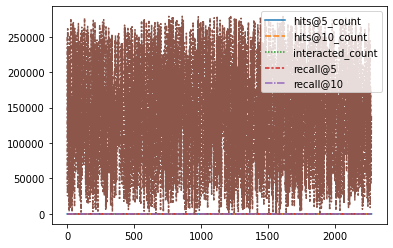

In [123]:
sns.lineplot(data=cf_detailed_results_df)

In [124]:
# check 
interactions_full_indexed_df.shape

(62191, 3)

In [125]:
interactions_full_indexed_df.head()

,ISBN,Book-Title,Book-Rating
User-ID,,,
243,0060977493,The God of Small Things,3.000000
243,0375400117,Memoirs of a Geisha,3.459432
243,0449006522,Manhattan Hunt Club,2.807355
243,0553580388,The Patient,3.169925
243,0786863986,A Monk Swimming,2.584963


In [126]:
interactions_train_indexed_df.head()

,ISBN,Book-Title,Book-Rating
User-ID,,,
106768,0425172996,Vector,3.000000
208415,0399148027,Blue Diary,3.000000
91058,0515136530,"Key of Valor (Roberts, Nora. Key Trilogy, 3.)",3.169925
196502,0451169530,The Stand: Complete and Uncut,3.459432
26240,0440234743,The Testament,2.584963


In [128]:
interactions_test_indexed_df.head()

,ISBN,Book-Title,Book-Rating
User-ID,,,
249628,006101351X,The Perfect Storm : A True Story of Men Against the Sea,3.169925
40888,0440224853,The Ghost,3.321928
41589,0804106304,The Joy Luck Club,3.459432
25409,0743418174,Good in Bed,3.459432
262902,0743424425,The Shining,2.807355


In [129]:
interactions_full_indexed_df.to_csv("Collaborative-Data.csv")

In [132]:
cd

/root


# Hybrid 

In [179]:
df_merged = pd.read_csv("/content/drive/MyDrive/SML - CSE 575/Final Project /Dataset/merged_file.csv")


In [202]:
# we will keep 
cols = ['User-ID', 'ISBN', 'Book-Title', 'Book-Rating']
df_1 = df_merged[cols]
df_1

,User-ID,ISBN,Book-Title,Book-Rating
0,243,0060977493,the god of small things,3.000000
1,8253,0060977493,the god of small things,3.169925
2,8454,0060977493,the god of small things,3.169925
3,11676,0679457313,the god of small things,3.459432
4,12982,0679457313,the god of small things,3.321928
...,...,...,...,...
20655,225199,0061053104,the terminal experiment,3.000000
20656,264321,0061053104,the terminal experiment,3.000000
20657,187145,0151006903,baudolino,3.169925
20658,225986,0752837613,the lost boy,3.321928


Enter a User-Id or a book Name in the code block below
1
Not an integer


In [ ]:
inp = "#put something here"
try:
  inp = int(inp)
  cf_recommender_model.recommend_items(inp,items_to_ignore= get_items_interacted(inp,df_1),verbose=True)
except:
  content(inp)

In [194]:
user_id = 12982
res = cf_recommender_model.recommend_items(user_id,items_to_ignore= get_items_interacted(user_id,df_1),verbose=True)
res

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0440214041,The Pelican Brief,John Grisham,1993,Dell
1,0440213525,The Client,John Grisham,1994,Dell Publishing Company
2,0440211727,A Time to Kill,JOHN GRISHAM,1992,Dell
3,0440221471,The Runaway Jury,JOHN GRISHAM,1997,Dell
4,0345370775,Jurassic Park,Michael Crichton,1999,Ballantine Books
5,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group
6,0440220602,The Chamber,John Grisham,1995,Dell Publishing Company
7,0440224764,The Partner,John Grisham,1998,Dell Publishing Company
8,0804106304,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12)
9,0380756293,The Magic of You (Malory Novels (Paperback)),Johanna Lindsey,1993,Avon


In [220]:
def content(title):
    # finding cosine similarity for the vectors
    # print("Content based algo: ", title)
    cosine_tfidf_count = np.loadtxt('/content/drive/MyDrive/SML - CSE 575/Final Project /Dataset/hybrid.csv', delimiter = ',')
    # taking the title and book image link and store in new data frame called books
    # books = data[['title', 'image_link']]
    data = pd.read_csv('/content/drive/MyDrive/SML - CSE 575/Final Project /Dataset/final_intersection_dataset.csv')
    books = data[['title']]
    #Reverse mapping of the index
    indices = pd.Series(data.index, index = data['title']).drop_duplicates()
    idx = indices[title]
    sim_scores = list(enumerate(cosine_tfidf_count[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:11]
    book_indices = [i[0] for i in sim_scores]
    recommend = books.iloc[book_indices]
    for index, row in recommend.iterrows():
      print(row['title'])
        # response = requests.get(row['image_link'])
        # img = Image.open(BytesIO(response.content))
        # plt.figure()
        # plt.imshow(img)
        # plt.title(row['title'])

In [221]:
print("Enter a User-Id or a book Name in the code block below")


Enter a User-Id or a book Name in the code block below


In [226]:
# examples
# User id(s): 11676, 12982, 8454
# Book names: "animal farm", "a clockwork orange", 'the plague'
print("Implementing Hybrid Filtering::")
inp = "a clockwork orange"
try:
  inp = int(inp)
  #print("Using Collaborative Filtering for user: ", inp)
  display(cf_recommender_model.recommend_items(inp,items_to_ignore= get_items_interacted(inp,df_1),verbose=True))
except:
  content(inp)

Implementing Hybrid Filtering::
Content based algo:  a clockwork orange
skeleton key
point blanc
stormbreaker
double cross
violets are blue
little boy blue
picture perfect
genome
flesh and blood
the spell


In [ ]:
# book_list_content = res['Book-Title'].values.tolist()
# d = {}
# for books in book_list_content:
#   # if books not in d.keys():
#   #   d[books] = 1
#   # else:
#   #   d[books]+= 1
#   print("Transferring for: ", books.lower() )
#   listOfBooks = content(books.lower())
#   print(listOfBooks)
#   print("\n -----------------------")
#   print(d)
#   print("\n -----------------------")
#   # for book in listOfBooks:
#   #   if book not in d.keys():
#   #     d[book] = 1
#   #   else:
#   #     d[book]+=1

In [168]:
import operator
sorted_data = sorted(d.items(), key=operator.itemgetter(1), reverse=True)
sorted_data

[('book1', 13), ('book2', 10), ('book3', 2)]